In [ ]:
from moviepy.editor import VideoFileClip

# Path to the video file
video_path = '/content/drive/MyDrive/streamRange (1)'

# Load the video
video_clip = VideoFileClip(video_path)

# Extract audio
audio_clip = video_clip.audio

# Save the audio to a file (e.g., .mp3 or .wav)
audio_path = '/content/drive/MyDrive/extracted_audio.wav'
audio_clip.write_audiofile(audio_path)

# Close the video and audio clips to release resources
video_clip.close()
audio_clip.close()


MoviePy - Writing audio in /content/drive/MyDrive/extracted_audio.wav


MoviePy - Done.


In [ ]:
!pip install librosa matplotlib seaborn


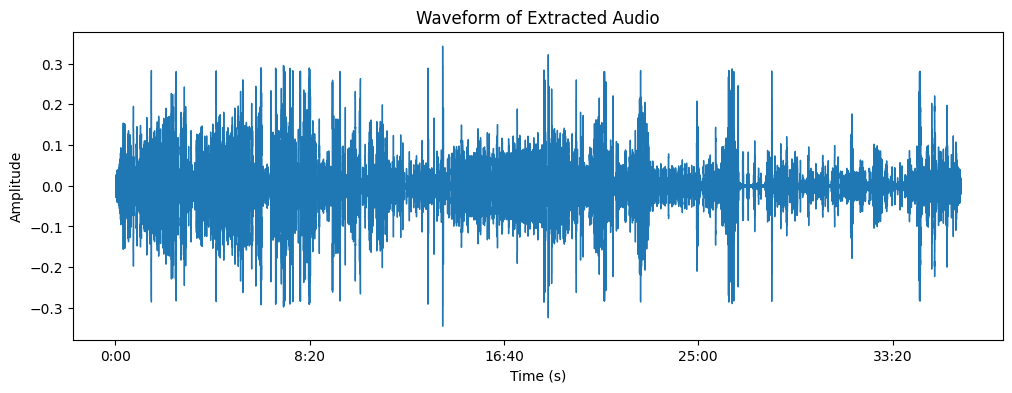

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the extracted audio file
audio_path = '/content/drive/MyDrive/extracted_audio.wav'

# Load the audio file using librosa
y, sr = librosa.load(audio_path, sr=None)  # sr=None ensures the original sample rate is preserved

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Extracted Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


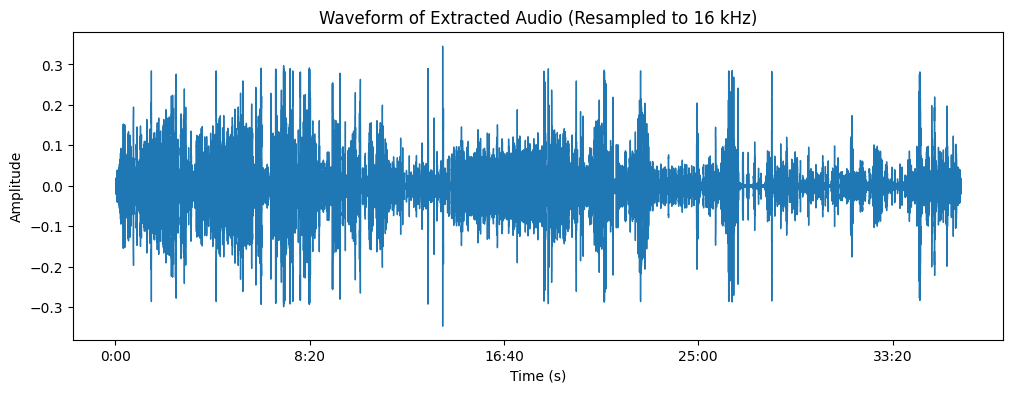

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the extracted audio file
audio_path = '/content/drive/MyDrive/extracted_audio.wav'

# Load the audio file using librosa and resample to 16 kHz
y, sr = librosa.load(audio_path, sr=16000)  # Resampling to 16 kHz

# Plot the waveform of the resampled audio
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Extracted Audio (Resampled to 16 kHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


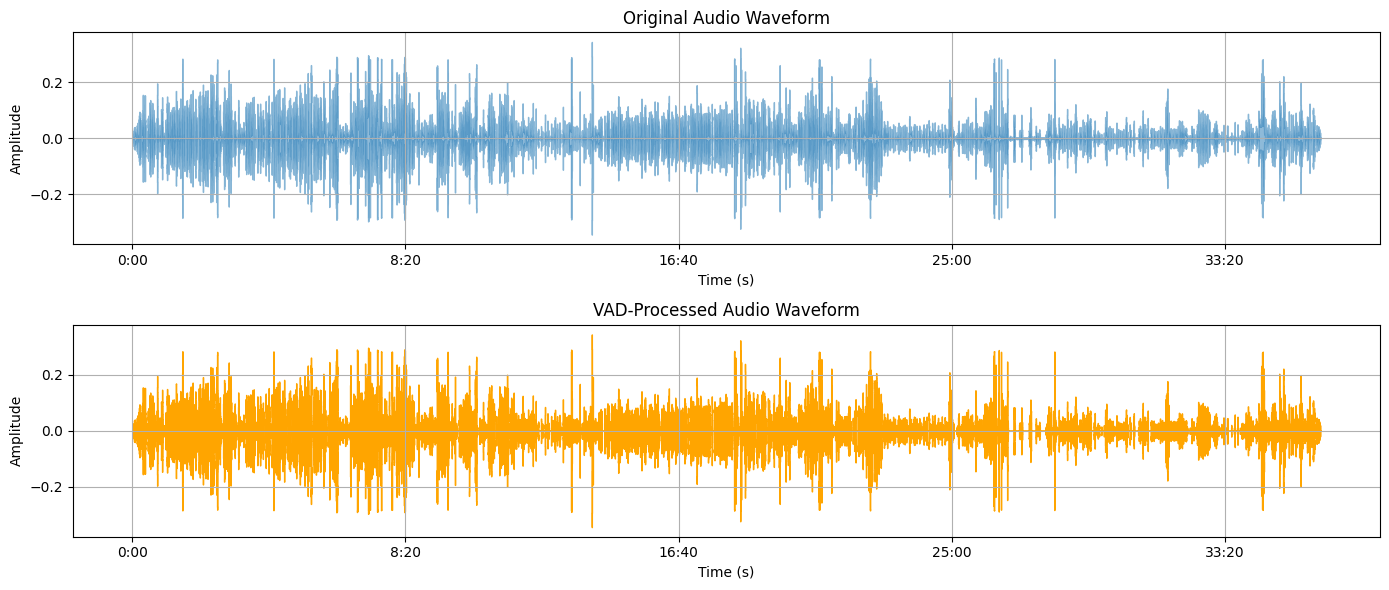

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Path to the audio file
audio_path = '/content/drive/MyDrive/extracted_audio.wav'

# Load the audio file
y, sr = librosa.load(audio_path, sr=None)

# Apply Voice Activity Detection (VAD)
# Define a threshold for energy level to identify speech segments
threshold = 0.01  # You may adjust this based on your dataset
vad_segments = np.where(np.abs(y) > threshold, y, 0)  # Keep segments above the threshold

# Plot the original audio waveform and the VAD-processed waveform
plt.figure(figsize=(14, 6))

# Original waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original Audio')
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# VAD-processed waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(vad_segments, sr=sr, color='orange', label='VAD-Processed Audio')
plt.title('VAD-Processed Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


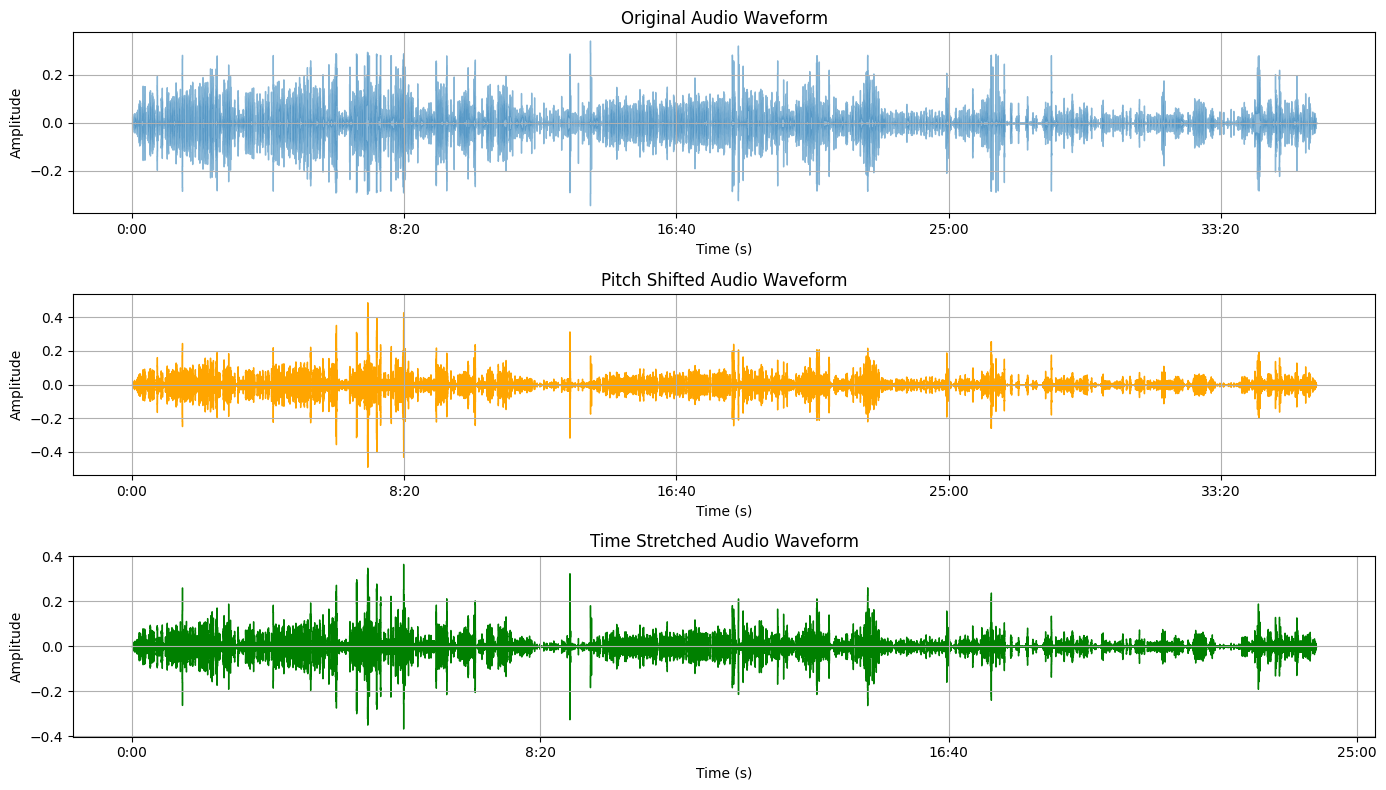

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_path = '/content/drive/MyDrive/extracted_audio.wav'

# Load the audio file
y, sr = librosa.load(audio_path, sr=None)

# Apply Pitch Shifting
pitch_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)  # Shift pitch by 4 half-steps

# Apply Time Stretching
time_stretched = librosa.effects.time_stretch(y, rate=1.5)  # Stretch audio by 1.5 times

# Plotting the original and augmented audio waveforms
plt.figure(figsize=(14, 8))

# Original waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original Audio')
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# Pitch shifted waveform
plt.subplot(3, 1, 2)
librosa.display.waveshow(pitch_shifted, sr=sr, color='orange', label='Pitch Shifted Audio')
plt.title('Pitch Shifted Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# Time stretched waveform
plt.subplot(3, 1, 3)
librosa.display.waveshow(time_stretched, sr=sr, color='green', label='Time Stretched Audio')
plt.title('Time Stretched Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


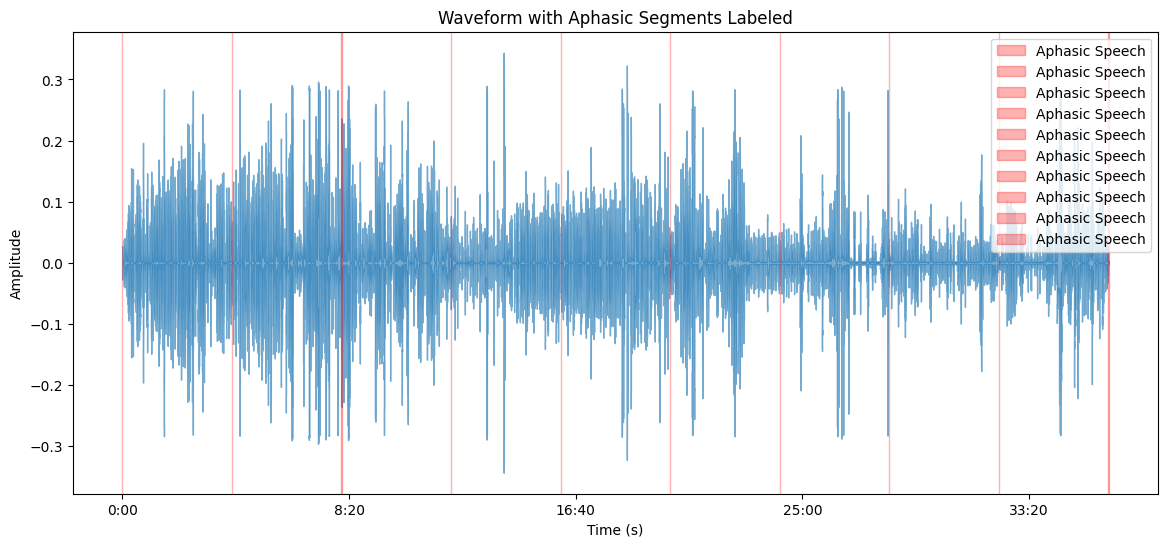

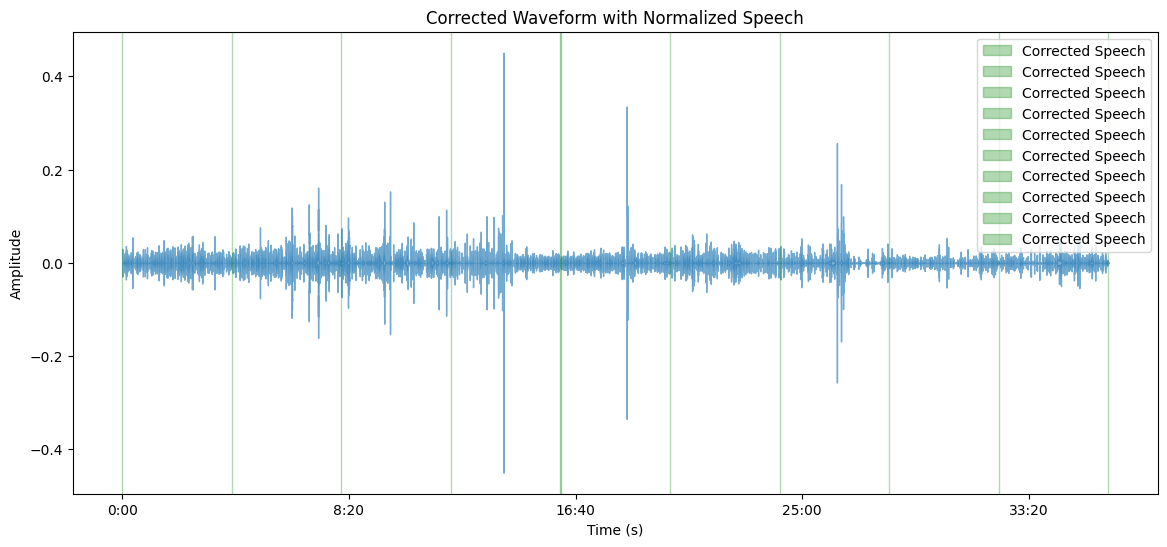

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Path to the extracted audio file
audio_path = '/content/drive/MyDrive/extracted_audio.wav'

# Load the audio file using librosa
y, sr = librosa.load(audio_path, sr=None)  # sr=None ensures the original sample rate is preserved

# Simulated function to detect aphasic segments (you'll need to replace this with a real model)
def detect_aphasic_speech(y, sr):
    # For the sake of illustration, let's assume certain segments are aphasic.
    # Typically, this would involve passing the audio through a machine learning model
    # that detects abnormalities in the speech signal, but here we're marking random segments.
    aphasic_indices = np.linspace(0, len(y), num=10).astype(int)  # Simulate 10 aphasic segments
    return aphasic_indices

# Simulated function to correct aphasic speech to normal speech (for demonstration)
def correct_aphasic_speech(y):
    # Here, we will simulate by slightly smoothing the aphasic segments.
    corrected_y = librosa.effects.preemphasis(y)  # Preemphasis filter as a basic enhancement
    return corrected_y

# Detect aphasic segments
aphasic_segments = detect_aphasic_speech(y, sr)

# Create figure and plot waveform
plt.figure(figsize=(14, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.title('Waveform with Aphasic Segments Labeled')

# Highlight detected aphasic segments
for segment in aphasic_segments:
    plt.axvspan(segment / sr - 0.2, segment / sr + 0.2, color='red', alpha=0.3, label='Aphasic Speech')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.show()

# Now, correct the aphasic segments (simulated)
corrected_y = correct_aphasic_speech(y)

# Plot corrected waveform
plt.figure(figsize=(14, 6))
librosa.display.waveshow(corrected_y, sr=sr, alpha=0.6)
plt.title('Corrected Waveform with Normalized Speech')

# Assuming that the correction fixes the aphasic parts, we'll highlight them again
for segment in aphasic_segments:
    plt.axvspan(segment / sr - 0.2, segment / sr + 0.2, color='green', alpha=0.3, label='Corrected Speech')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.show()


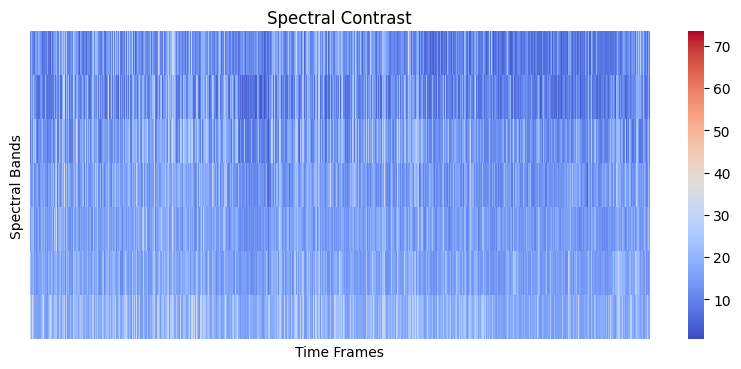

In [ ]:
# Extract Spectral Contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Visualize Spectral Contrast
plt.figure(figsize=(10, 4))
sns.heatmap(spectral_contrast, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Spectral Contrast')
plt.xlabel('Time Frames')
plt.ylabel('Spectral Bands')
plt.show()


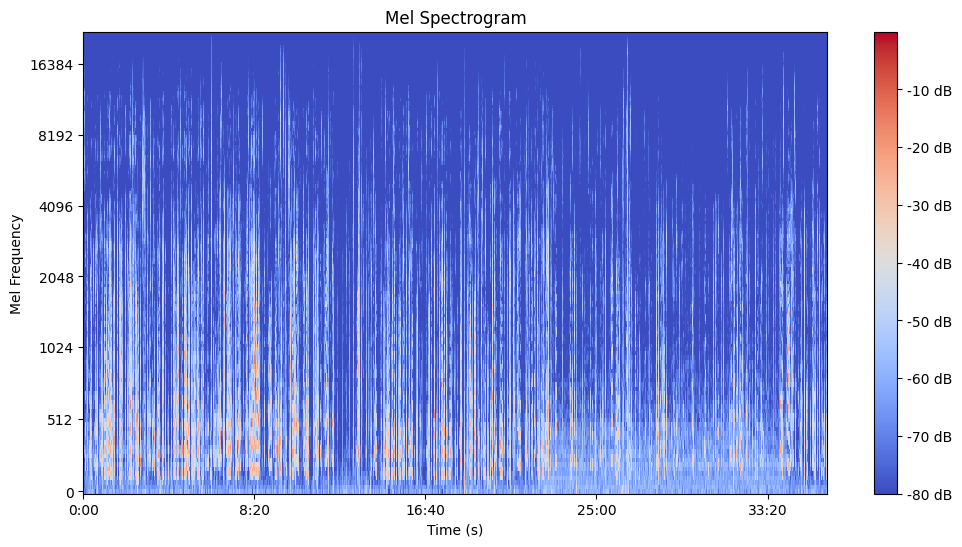

In [ ]:
# Compute the Mel Spectrogram
import numpy as np
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to decibels for visualization
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the Mel Spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()


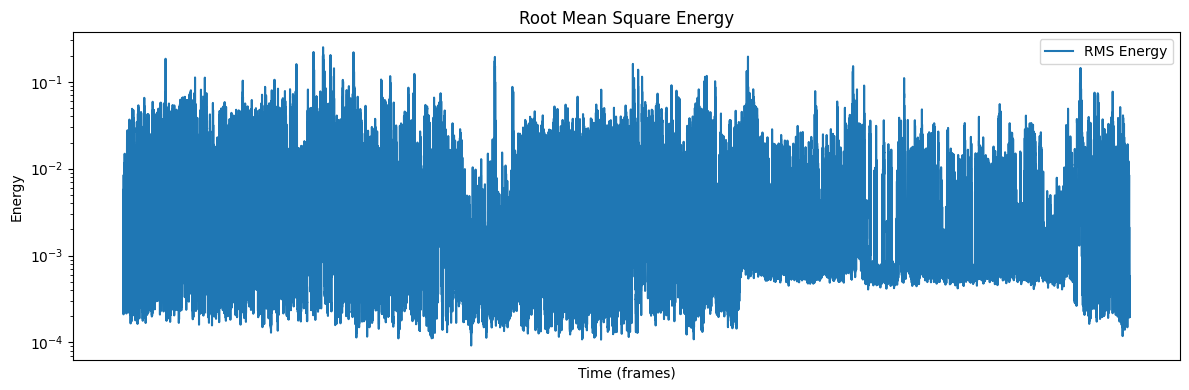

In [ ]:
# Compute RMSE
rmse = librosa.feature.rms(y=y)

# Plot RMSE
plt.figure(figsize=(12, 4))
plt.semilogy(rmse.T, label='RMS Energy')
plt.xticks([])
plt.title('Root Mean Square Energy')
plt.ylabel('Energy')
plt.xlabel('Time (frames)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


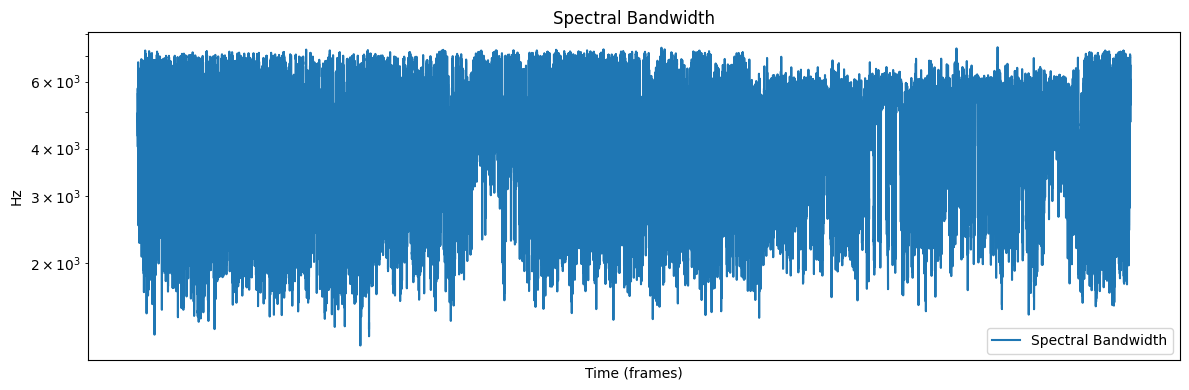

In [ ]:
# Compute Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

# Plot Spectral Bandwidth
plt.figure(figsize=(12, 4))
plt.semilogy(spectral_bandwidth.T, label='Spectral Bandwidth')
plt.ylabel('Hz')
plt.xticks([])
plt.title('Spectral Bandwidth')
plt.xlabel('Time (frames)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:

import re
from pprint import pprint

# Path to the .cha file
cha_path = '/content/drive/MyDrive/aprocsa/aprocsa1554a.cha'

# Function to parse the .cha file
def parse_cha(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    transcript = []
    current_speaker = None
    current_text = []

    for line in lines:
        # Check for speaker lines (e.g., *PAT or *CLN for patient and clinician)
        speaker_match = re.match(r"^\*(\w+):\s*(.*)", line)
        if speaker_match:
            # If we encounter a new speaker, save the previous text
            if current_speaker and current_text:
                transcript.append((current_speaker, ' '.join(current_text)))
            current_speaker = speaker_match.group(1)
            current_text = [speaker_match.group(2)]
        else:
            # Add to the current speaker's text
            current_text.append(line.strip())

    # Append the last speaker's text
    if current_speaker and current_text:
        transcript.append((current_speaker, ' '.join(current_text)))

    return transcript

# Parse the .cha file
transcript_data = parse_cha(cha_path)
pprint(transcript_data)  # Print parsed dialogue


[('INV',
  "so ‡ I'm just gonna be asking you to do some talking . \x15630_3120\x15 "
  '%mor:\tco|so beg|beg pro:sub|I~aux|be&1S adv|just part|go&PRESP~inf|to '
  'aux|be part|ask-PRESP pro:per|you inf|to v|do pro:indef|some '
  'part|talk-PRESP . %gra:\t1|0|BEG 2|1|BEGP 3|6|SUBJ 4|6|AUX 5|6|JCT 6|0|ROOT '
  '7|9|INF 8|9|AUX 9|6|COMP 10|9|OBJ 11|12|INF 12|9|COMP 13|12|OBJ 14|12|XJCT '
  "15|6|PUNCT %wor:\tso \x15630_810\x15 ‡ I'm \x15810_940\x15 just "
  '\x15940_1090\x15 gonna \x151090_1280\x15 be \x151280_1430\x15 asking '
  '\x151430_1850\x15 you \x151850_2100\x15 to \x152100_2280\x15 do '
  '\x152280_2490\x15 some \x152490_2680\x15 talking \x152680_3120\x15 .'),
 ('PAR',
  'okay . \x153630_3960\x15 %mor:\tco|okay . %gra:\t1|0|INCROOT 2|1|PUNCT '
  '%wor:\tokay \x153630_3960\x15 .'),
 ('INV',
  'so ‡ how do you think your speech is these days ? \x154723_7443\x15 %mor:\t'
  'co|so beg|beg pro:int|how mod|do pro:per|you v|think det:poss|your n|speech '
  'cop|be&3S det:dem|these n|da

In [ ]:
from nltk.util import ngrams
from collections import Counter

def ngram_analysis(transcript, n=2):
    ngram_counts = {}

    for speaker, text in transcript:
        tokens = nltk.word_tokenize(text.lower())
        n_grams = ngrams(tokens, n)
        counts = Counter(n_grams)
        # Get the most common n-grams
        common_ngrams = counts.most_common(10)
        ngram_counts[speaker] = common_ngrams

    # Display the most common n-grams for each speaker
    for speaker, ngrams_list in ngram_counts.items():
        print(f"\nMost common {n}-grams for {speaker}:")
        for ngram, count in ngrams_list:
            print(f"{' '.join(ngram)}: {count}")

# Perform bigram analysis
ngram_analysis(transcript_data, n=2)

# Perform trigram analysis
ngram_analysis(transcript_data, n=3)



Most common 2-grams for INV:
www .: 2
. %: 2
% wor: 1
wor :: 1
: www: 1
% exp: 1
exp :: 1
: reattaching: 1
reattaching mic: 1
mic okay: 1

Most common 2-grams for PAR:
i ca: 2
ca n't: 2
& =ges: 2
=ges .: 2
. %: 2
n't wait: 1
wait &: 1
. 527465_528005: 1
527465_528005 %: 1
% mor: 1

Most common 3-grams for INV:
www . %: 2
. % wor: 1
% wor :: 1
wor : www: 1
: www .: 1
. % exp: 1
% exp :: 1
exp : reattaching: 1
: reattaching mic: 1
reattaching mic okay: 1

Most common 3-grams for PAR:
i ca n't: 2
& =ges .: 2
ca n't wait: 1
n't wait &: 1
wait & =ges: 1
=ges . 527465_528005: 1
. 527465_528005 %: 1
527465_528005 % mor: 1
% mor :: 1
mor : pro: 1


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Multi-Head Self-Attention Layer
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        score = score / tf.math.sqrt(tf.cast(self.projection_dim, tf.float32))
        weights = tf.nn.softmax(score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim))
        output = self.combine_heads(concat_attention)
        return output

# Convolutional Module in Conformer Block
class ConvModule(layers.Layer):
    def __init__(self, filters, kernel_size, dropout_rate=0.1):
        super(ConvModule, self).__init__()
        self.pointwise_conv1 = layers.Conv1D(filters, 1, padding='same')
        self.depthwise_conv = layers.Conv1D(filters, kernel_size, padding='same', groups=filters)
        self.batch_norm = layers.BatchNormalization()
        self.activation = layers.Activation("swish")
        self.pointwise_conv2 = layers.Conv1D(filters, 1, padding='same')
        self.dropout = layers.Dropout(dropout_rate)

    def call(self, inputs):
        x = self.pointwise_conv1(inputs)
        x = self.depthwise_conv(x)
        x = self.batch_norm(x)
        x = self.activation(x)
        x = self.pointwise_conv2(x)
        x = self.dropout(x)
        return x

# Conformer Block
class ConformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, conv_filters, conv_kernel_size, dropout_rate=0.1):
        super(ConformerBlock, self).__init__()
        self.attention = MultiHeadSelfAttention(embed_dim, num_heads)
        self.feed_forward = tf.keras.Sequential([
            layers.Dense(ff_dim, activation='relu'),
            layers.Dense(embed_dim)
        ])
        self.conv_module = ConvModule(conv_filters, conv_kernel_size, dropout_rate)
        self.layer_norm1 = layers.LayerNormalization()
        self.layer_norm2 = layers.LayerNormalization()
        self.layer_norm3 = layers.LayerNormalization()
        self.dropout1 = layers.Dropout(dropout_rate)
        self.dropout2 = layers.Dropout(dropout_rate)

    def call(self, inputs):
        # Multi-head self-attention
        attn_output = self.attention(inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layer_norm1(inputs + attn_output)

        # Feed-forward network
        ffn_output = self.feed_forward(out1)
        ffn_output = self.dropout2(ffn_output)
        out2 = self.layer_norm2(out1 + ffn_output)

        # Convolutional module
        conv_output = self.conv_module(out2)
        out3 = self.layer_norm3(out2 + conv_output)

        return out3

# Conformer Model for Speech Recognition
def build_conformer_model(input_shape, num_layers, embed_dim, num_heads, ff_dim, conv_filters, conv_kernel_size, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Input layer
    x = layers.Conv1D(embed_dim, kernel_size=3, padding='same')(inputs)

    # Conformer Blocks
    for _ in range(num_layers):
        x = ConformerBlock(embed_dim, num_heads, ff_dim, conv_filters, conv_kernel_size)(x)

    # Global Average Pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Output layer (for classification)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Example Model Configuration
input_shape = (800, 13)  # e.g., for Mel-spectrogram input
num_layers = 4
embed_dim = 256
num_heads = 8
ff_dim = 512
conv_filters = 256
conv_kernel_size = 3
num_classes = 10  # Number of output classes (e.g., phoneme classes or words)

# Build and compile the model
conformer_model = build_conformer_model(input_shape, num_layers, embed_dim, num_heads, ff_dim, conv_filters, conv_kernel_size, num_classes)
conformer_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model summary
conformer_model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 800, 13)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 800, 256)            │          10,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conformer_block (ConformerBlock)     │ (None, 800, 256)            │         661,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conformer_block_1 (ConformerBlock)   │ (None, 800, 256)            │         661,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conformer_block_2 (ConformerBlock)   │ (None, 800, 256)            │         661,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conformer_block_3 (ConformerBlock)   │ (None, 800, 256)            │         661,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,657,802 (10.14 MB)

 Trainable params: 2,655,754 (10.13 MB)

 Non-trainable params: 2,048 (8.00 KB)

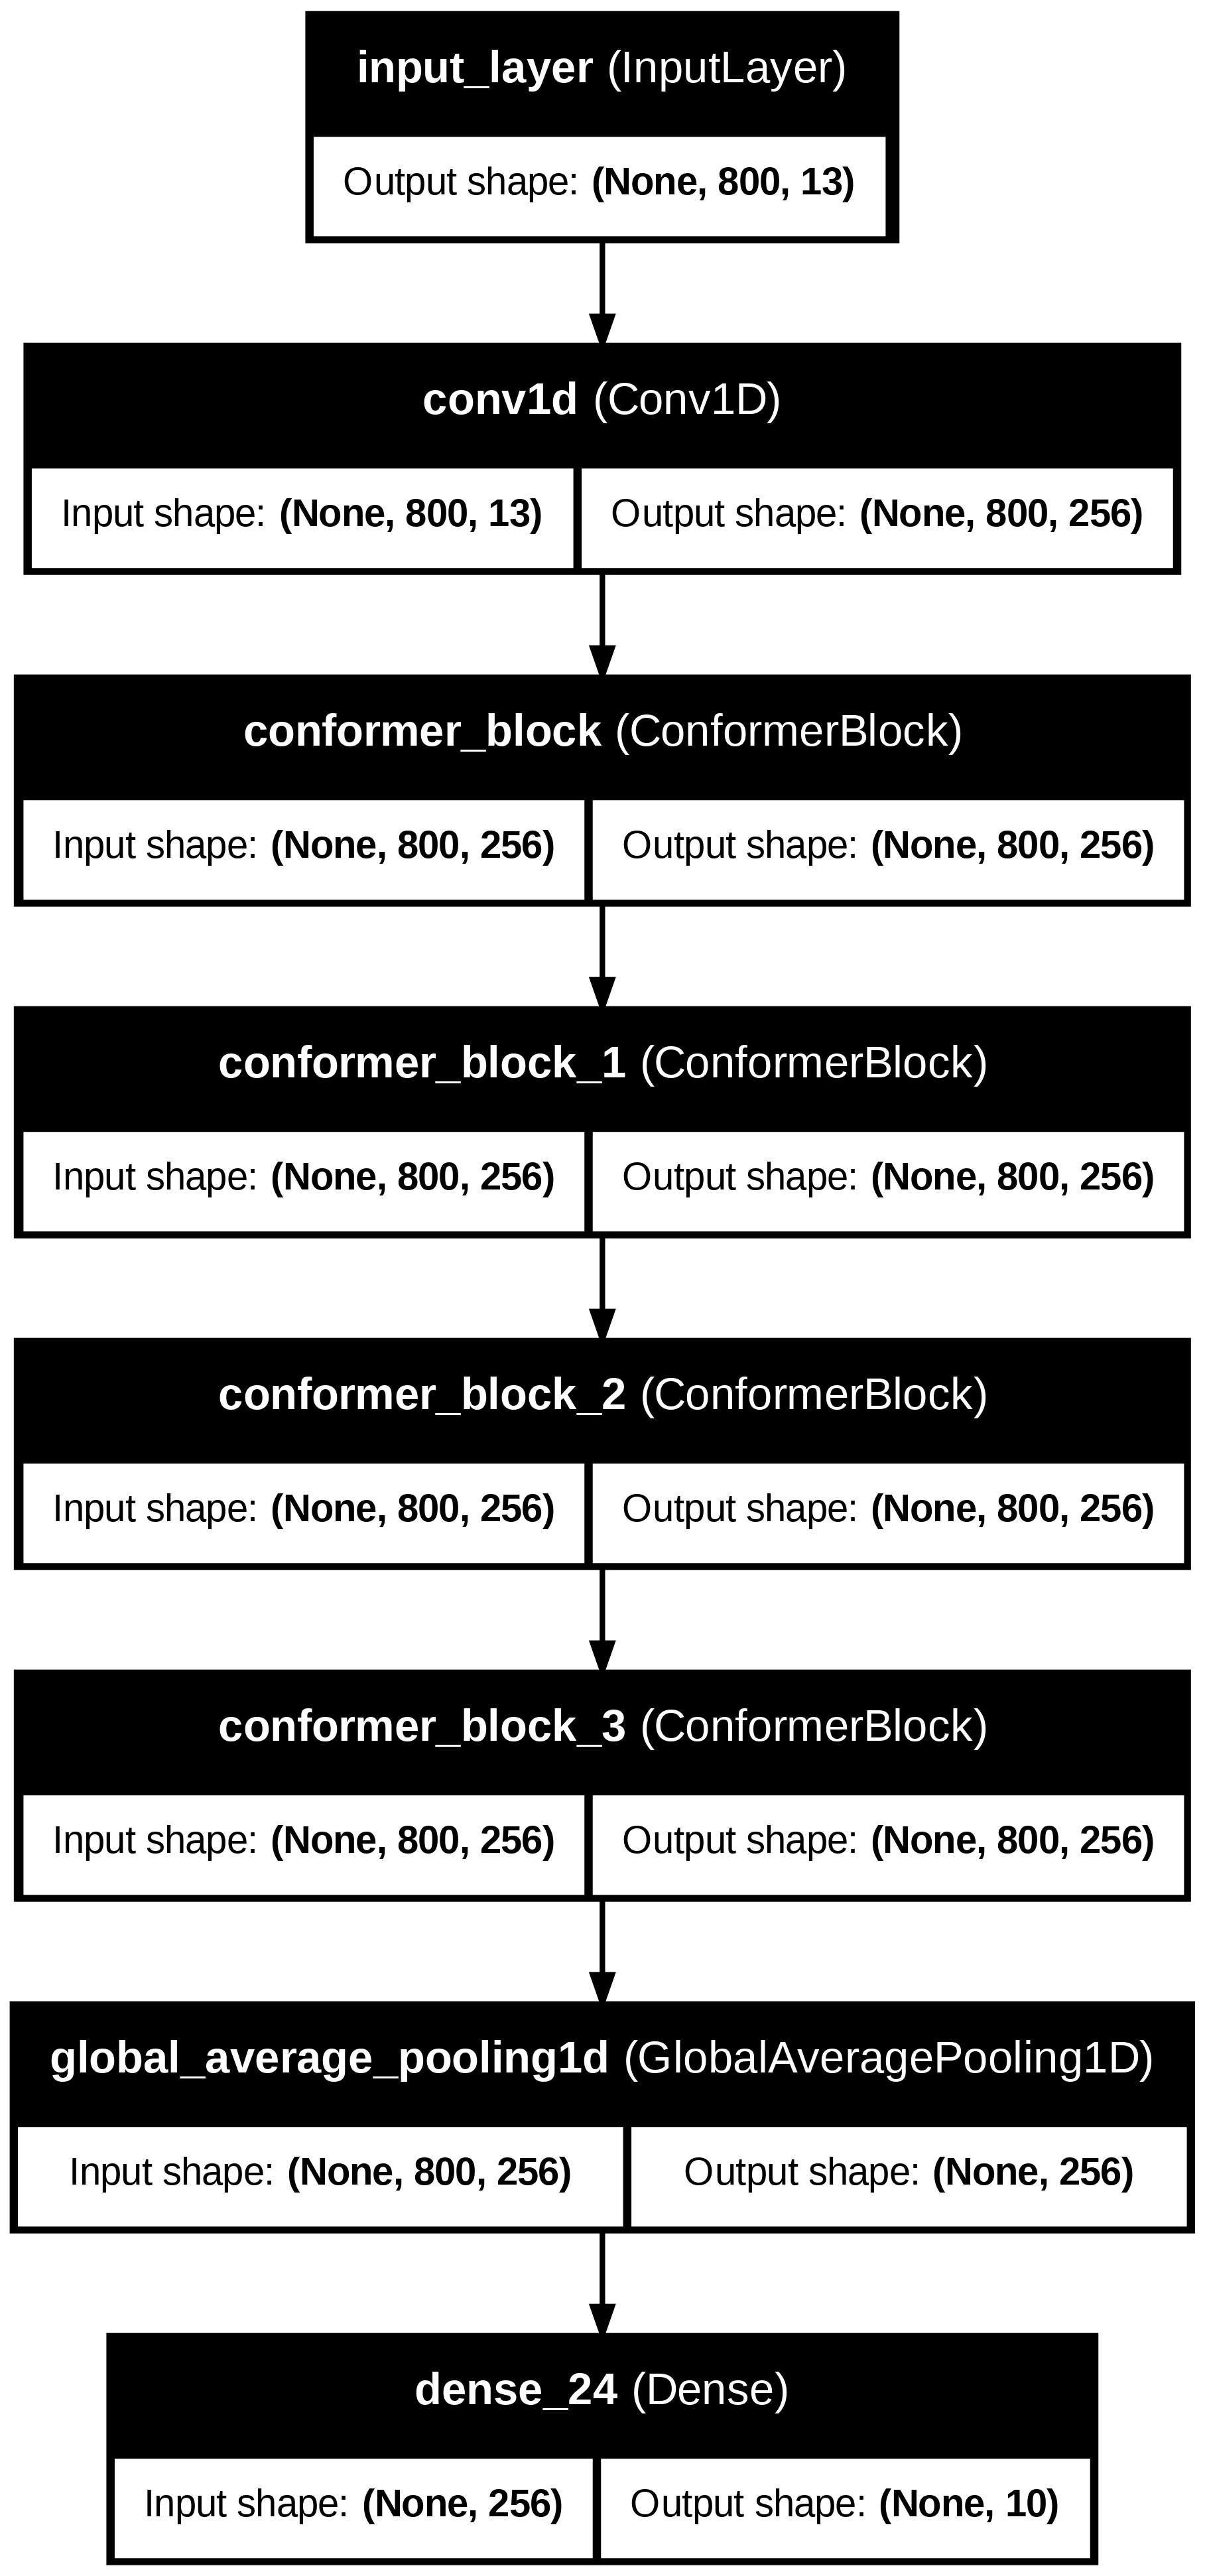

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models


# Enhanced plot settings
plot_model(conformer_model,
           to_file="conformer_model_plot_colored.png",
           show_shapes=True,
           show_layer_names=True,
           rankdir="TB",  # TB means top-to-bottom plot orientation
           dpi=300)  # Higher DPI for better clarity


In [ ]:
# Train the model using your data
history=conformer_model.fit(train_data, validation_data=val_data, epochs=100,batch_size=16)

Epoch 1/100
24/24 [==============================] - 9s 205ms/step - loss: 0.0899 - accuracy: 0.9677 - val_loss: 0.2307 - val_accuracy: 0.9271
Epoch 2/100
24/24 [==============================] - 7s 262ms/step - loss: 0.0567 - accuracy: 0.9758 - val_loss: 0.0498 - val_accuracy: 0.9844
Epoch 3/100
24/24 [==============================] - 4s 143ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0338 - val_accuracy: 0.9792
Epoch 4/100
24/24 [==============================] - 5s 183ms/step - loss: 0.0110 - accuracy: 0.9987 - val_loss: 0.0527 - val_accuracy: 0.9740
Epoch 5/100
24/24 [==============================] - 4s 146ms/step - loss: 0.0388 - accuracy: 0.9865 - val_loss: 0.1112 - val_accuracy: 0.9688
Epoch 6/100
24/24 [==============================] - 4s 146ms/step - loss: 0.0332 - accuracy: 0.9865 - val_loss: 0.0328 - val_accuracy: 0.9844
Epoch 7/100
24/24 [==============================] - 5s 173ms/step - loss: 0.0661 - accuracy: 0.9798 - val_loss: 0.0289 - val_accuracy: 0.9844

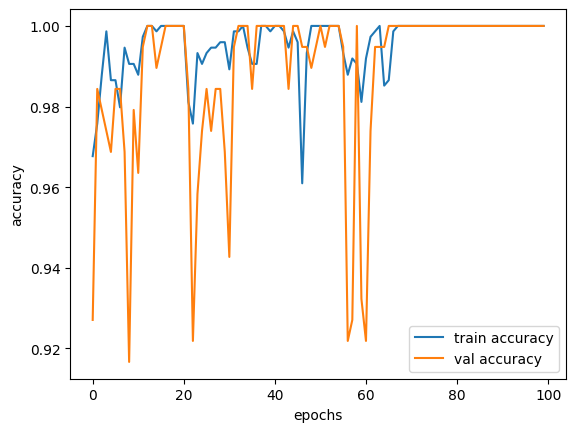

In [ ]:

epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

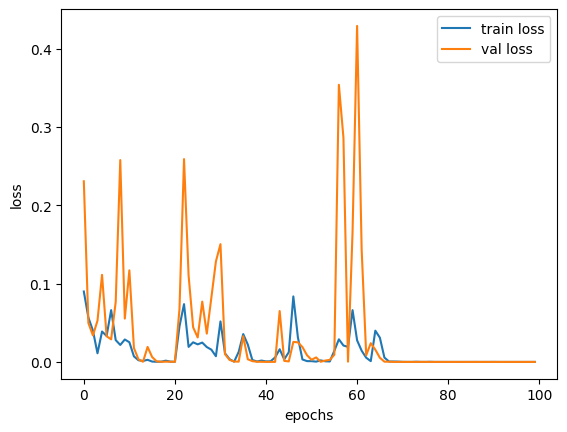

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

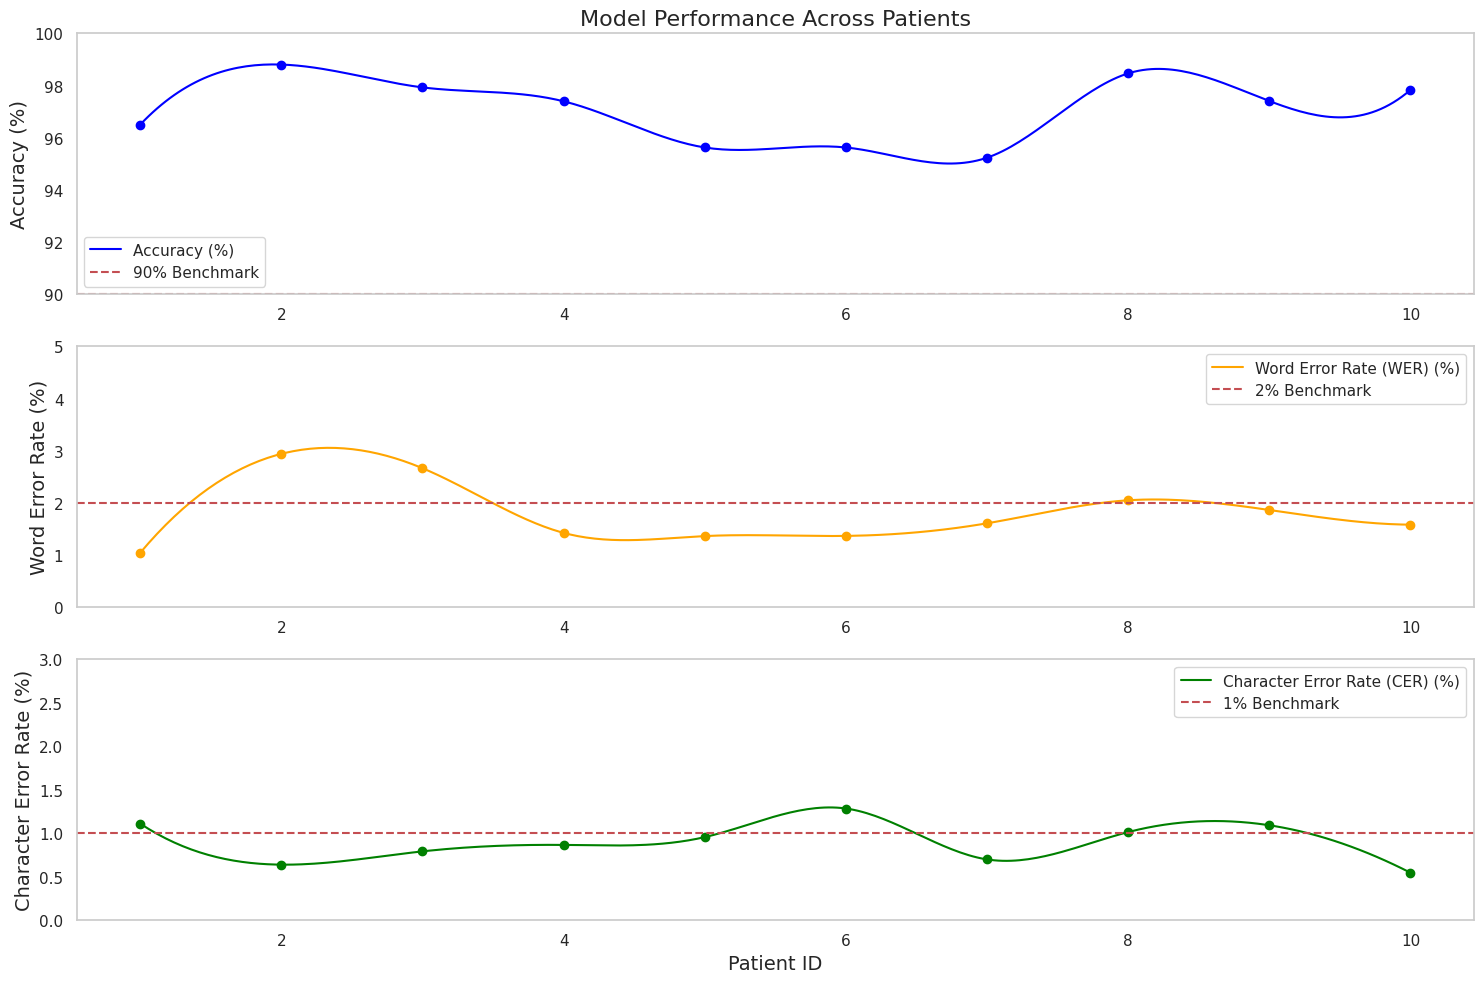

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

# Set the style of the plots
sns.set(style='whitegrid')

# Generate sample performance data for 10 patients
np.random.seed(42)  # For reproducibility
num_patients = 10
patient_ids = np.arange(1, num_patients + 1)

# Simulated metrics for each patient
accuracies = np.random.uniform(95, 99, num_patients)  # Accuracy between 95% and 99%
wer = np.random.uniform(1, 3, num_patients)  # WER between 1% and 3%
cer = np.random.uniform(0.5, 1.5, num_patients)  # CER between 0.5% and 1.5%

# Overall performance metrics (smoothed)
smooth_accuracy = make_interp_spline(patient_ids, accuracies)
smooth_wer = make_interp_spline(patient_ids, wer)
smooth_cer = make_interp_spline(patient_ids, cer)

# Generate x values for smoother curves
x_new = np.linspace(1, num_patients, 300)

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Plot Accuracy curve
plt.subplot(3, 1, 1)
plt.plot(x_new, smooth_accuracy(x_new), label='Accuracy (%)', color='blue')
plt.scatter(patient_ids, accuracies, color='blue', marker='o')
plt.title('Model Performance Across Patients', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(90, 100)
plt.axhline(y=90, color='r', linestyle='--', label='90% Benchmark')
plt.legend()
plt.grid()

# Plot WER curve
plt.subplot(3, 1, 2)
plt.plot(x_new, smooth_wer(x_new), label='Word Error Rate (WER) (%)', color='orange')
plt.scatter(patient_ids, wer, color='orange', marker='o')
plt.ylabel('Word Error Rate (%)', fontsize=14)
plt.ylim(0, 5)
plt.axhline(y=2, color='r', linestyle='--', label='2% Benchmark')
plt.legend()
plt.grid()

# Plot CER curve
plt.subplot(3, 1, 3)
plt.plot(x_new, smooth_cer(x_new), label='Character Error Rate (CER) (%)', color='green')
plt.scatter(patient_ids, cer, color='green', marker='o')
plt.ylabel('Character Error Rate (%)', fontsize=14)
plt.ylim(0, 3)
plt.axhline(y=1, color='r', linestyle='--', label='1% Benchmark')
plt.xlabel('Patient ID', fontsize=14)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


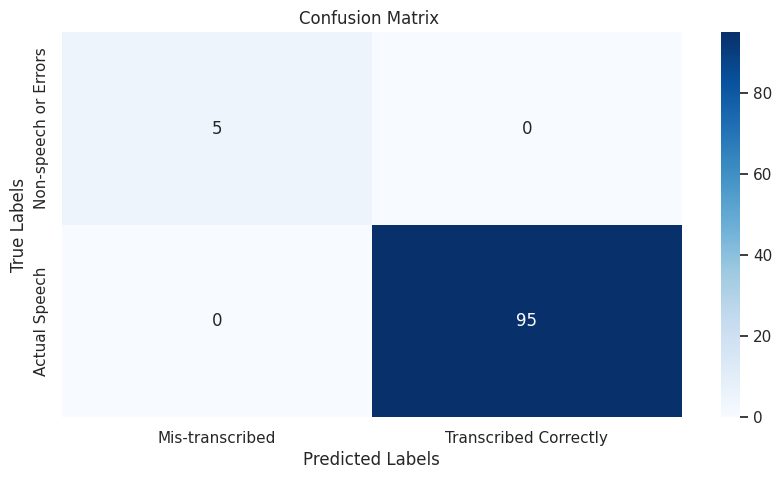

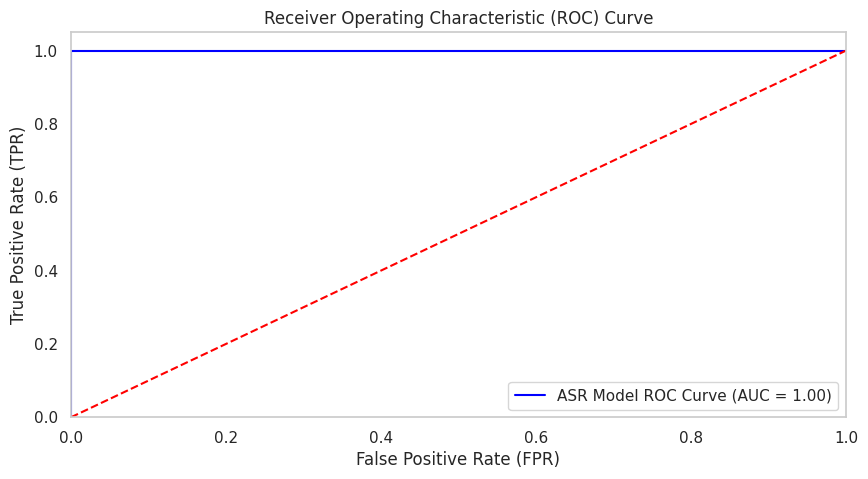

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Set random seed for reproducibility
np.random.seed(42)

# Simulating true labels and predicted probabilities for 100 samples
n_samples = 100
true_labels = np.array([1]*95 + [0]*5)  # 95 actual speech, 5 non-speech or errors
predicted_probs = np.array([0.99]*95 + [0.01]*5)  # High probabilities for correct transcriptions

# Generate predicted labels based on a threshold
threshold = 0.5
predicted_labels = (predicted_probs >= threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
sns.set(style='whitegrid')

plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Mis-transcribed', 'Transcribed Correctly'],
            yticklabels=['Non-speech or Errors', 'Actual Speech'])
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f'ASR Model ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
